In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import matplotlib.image as img
import numpy as np

In [2]:
(train_image, train_label), (test_image, test_label)=datasets.cifar10.load_data()

In [3]:
train_image, test_image=train_image/255., test_image/255.

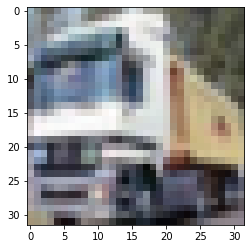

In [4]:
plt.imshow(train_image[1])

In [5]:
train_label[1]

array([9], dtype=uint8)

In [6]:
class_name=['airplane', 'automobile','bird','cat','deer','dog','frog',
           'horse','ship', 'truck']

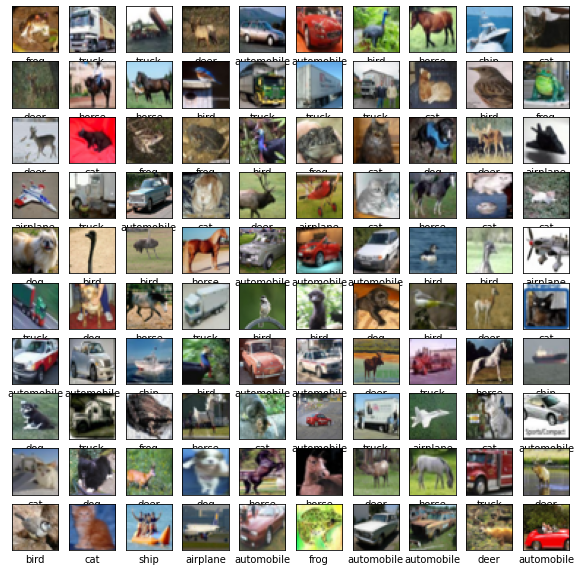

In [7]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i])
    plt.xlabel(class_name[train_label[i][0]])


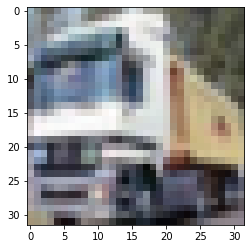

In [8]:
plt.imshow(train_image[1])

In [9]:
train_image[1].shape

(32, 32, 3)

In [10]:
model=models.Sequential()
#first convolutional layer
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(layers.MaxPool2D((2,2)))
#second convolutional layer
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))

#flatten output from previous layer
model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [12]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
history=model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4052 - accuracy: 0.4953 - val_loss: 1.1228 - val_accuracy: 0.6024
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9667 - accuracy: 0.6591 - val_loss: 0.9634 - val_accuracy: 0.6594
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8171 - accuracy: 0.7155 - val_loss: 0.8631 - val_accuracy: 0.6980
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7219 - accuracy: 0.7475 - val_loss: 0.8430 - val_accuracy: 0.7082
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6341 - accuracy: 0.7785 - val_loss: 0.8662 - val_accuracy: 0.7110
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5698 - accuracy: 0.7999 - val_loss: 0.8123 - val_accuracy: 0.7292
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5020 - accuracy: 0.8215 - val_loss: 0.9036 -

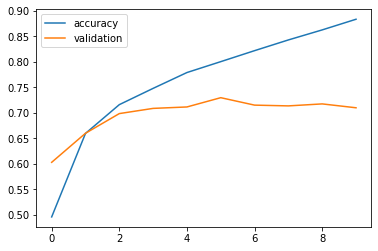

In [13]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()


In [14]:
test_loss, test_acc= model.evaluate(test_image,test_label)

313/313 [==============================] - 2s 5ms/step - loss: 1.0833 - accuracy: 0.7094


In [15]:
test_acc

0.7093999981880188

In [16]:
test_image[1].shape

(32, 32, 3)

In [17]:
test1=test_image[1].reshape(-1,32,32,3)

In [18]:
test1.shape

(1, 32, 32, 3)

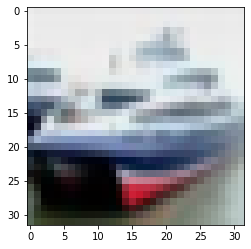

In [19]:
plt.imshow(test_image[1])

In [21]:
np.sum(model.predict(test1))

1.0

In [22]:
out=np.argmax(model.predict(test1))

In [23]:
class_name[out]

'ship'

In [24]:
def predict(image):
    input1=image.reshape(-1,32,32,3)
    index=np.argmax(model.predict(input1))
    return class_name[index]
    
    

In [25]:
predict(test_image[1])

'ship'

In [26]:
auto=img.imread('automobile.jpeg')

In [27]:
auto.shape

(32, 32, 3)

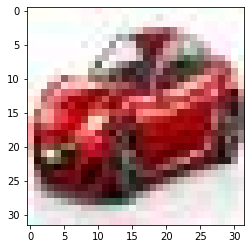

In [28]:
plt.imshow(auto)

In [29]:
predict(auto)

'automobile'

In [30]:
rev_auto=auto[:,::-1,:]

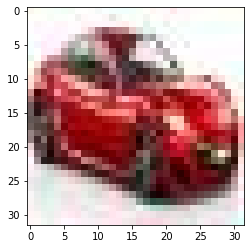

In [31]:
plt.imshow(rev_auto)

In [32]:
predict(rev_auto)

'automobile'

In [33]:
horse=img.imread('horse_human.jpeg')

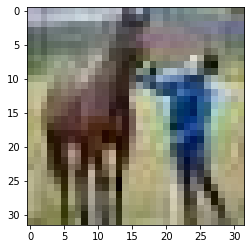

In [34]:
plt.imshow(horse)

In [35]:
predict(horse)

'horse'

In [36]:
horse.shape

(32, 32, 3)

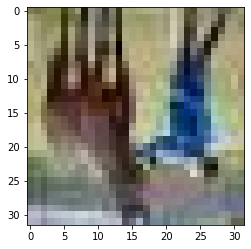

In [37]:
plt.imshow(horse[::-1,:,:])

In [38]:
rev_horse=horse[:,::-1,:]

In [39]:
predict(rev_horse)

'horse'

In [40]:
horse2=img.imread('horse.jpeg')

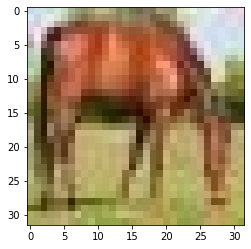

In [41]:
plt.imshow(horse2)

In [42]:
predict(horse2)

'horse'

In [43]:
horse3=horse2[:,::-1,:]

In [44]:
predict(horse3)

'horse'

1. 28*28 ---> flat --->(relu)dense 256 ---->(relu)dense 256---->dens 10(softmax)

2. predict(test[2])

3. image 0-9 downoald 28*28 --->predict -->predict

In [ ]:
final_project_mehrdad.maleki@gmail.com